### Fig 2b


In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os,sys
import random
import pickle
import json
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

## Load Data

In [8]:
def drawacar(test_event, carno=12):
    alldata, rankdata, acldata, flagdata = stagedata[test_event]
    
    #maxlap = get_event_info(test_event)[0]
    print('carno:', set(list(rankdata['car_number'].values)))
    print('laps:', set(list(rankdata['completed_laps'].values)))
    
    
    maxlap = max(list(rankdata['completed_laps'].values))
    
    a = rankdata[rankdata['completed_laps']>=maxlap-1]
    print(set(list(a['car_number'].values)))
    
    df12 = rankdata[rankdata['car_number']==carno]

    data = df12[['completed_laps','rank','last_laptime','time_behind_leader']].values
    pitstop = df12[['lap_status']].values
    caution = df12[['track_status']].values
    pitstop = np.array([1 if x=='P' else 0 for x in pitstop])
    caution = np.array([1 if x=='Y' else 0 for x in caution])
    pitidx = np.where(pitstop == 1)
    pits = data[pitidx]
    yidx = np.where(caution == 1)
    cautions = data[yidx]
    

    data = data[1:,:]
    
    #red = '#ff8080'
    red = 'red'
    #yellow = '#8080ff'
    yellow = 'yellow'
    #green = '#80ff80'
    green = 'green'
    
    
    print('maxlap:', maxlap)
    def add_status(axs,y=-1, height=1):
        for lap in range(maxlap):
            fc = green
            if caution[lap] == 1:
                fc = yellow
            if pitstop[lap] == 1:
                fc = red
            ec = fc
            rectangle = plt.Rectangle((lap,y), 1, height, fc=fc,ec=ec)
            #plt.gca().add_patch(rectangle)
            axs.add_patch(rectangle)

    lw=2

    fig, axs = plt.subplots(2, 1, figsize=(10, 4))
    axs[0].plot(data[:,0],data[:,1],'.-', linewidth=lw)
    #axs[0].plot(cautions[:,0],cautions[:,1],'.',color='y', label='CautionLap', linewidth=2)
    axs[0].plot(pits[:,0],pits[:,1],'^',color='r', label='PitStop', linewidth=lw)
    add_status(axs[0])
    axs[0].set_ylim((-1,19))
    axs[0].set_ylabel('Rank')

    axs[1].plot(data[:,0],data[:,2],'.-', linewidth=lw)
    #axs[1].plot(cautions[:,0],cautions[:,2],'.',color='y', label='CautionLap', linewidth=2)
    axs[1].plot(pits[:,0],pits[:,2],'^',color='r', label='PitStop', linewidth=lw)
    add_status(axs[1],13,4)
    axs[1].set_ylim((13,120))    

    axs[1].set_ylabel('LapTime(s)')
    axs[1].set_xlabel('Lap')

    axs[1].plot([0],[0],'s',color=green, label='NoramlLap', linewidth=lw)
    axs[1].plot([0],[0],'s',color=yellow, label='CautionLap', linewidth=lw)
    plt.legend(prop={'size': 10})    
    
    plt.tight_layout()
    plt.savefig('Fig2b-%s-car%d.pdf'%(test_event, carno))

In [9]:
def loaddata(datafile):
    with open(datafile, 'rb') as f:
        alldata = pickle.load(f, encoding='latin1') 
        return alldata
    


carno: {1, 3, 4, 6, 7, 9, 10, 12, 13, 14, 15, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 32, 33, 59, 60, 64, 66, 88, 98}
laps: {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193,

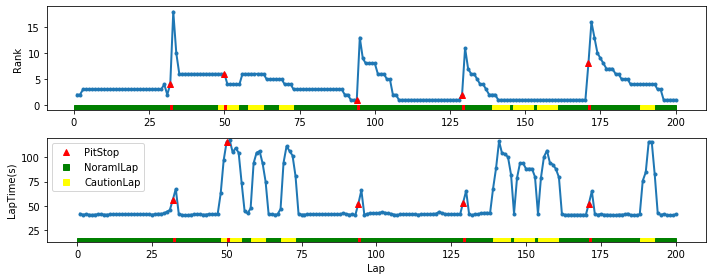

In [10]:
#data, pits, caution, pitstop = loaddata('Fig2-b.pickle')
STAGE_DATASET = 'stagedata-IndyCar_d16_v9_p0.pickle'

with open(STAGE_DATASET, 'rb') as f:
    stagedata = pickle.load(f, encoding='latin1') 
    
drawacar('Indy500-2018', carno=12)

In [ ]:
#drawacar('Texas-2018', carno=5)

In [ ]:
#drawacar('Pocono-2018', carno=1)

In [ ]:
#drawacar('Gateway-2018', carno=1)

In [ ]:
#drawacar('Phoenix-2018', carno=1)

In [ ]:
#drawacar('Texas-2019', carno=2)

In [ ]:
#drawacar('Indy500-2019', carno=12)